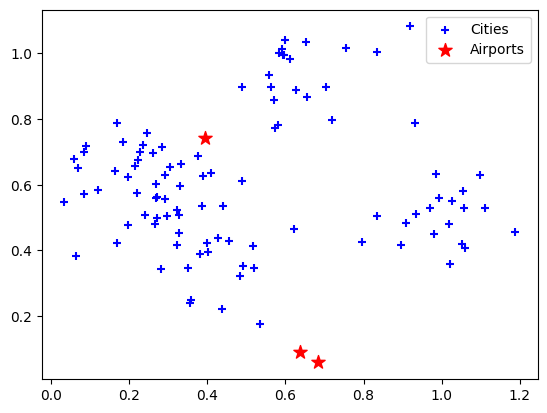

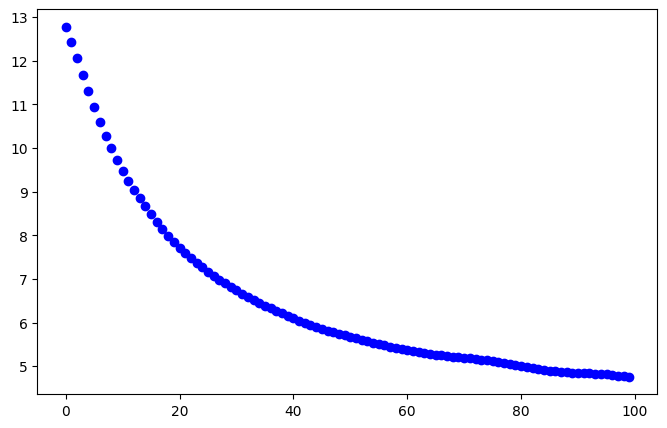

<module 'matplotlib.pyplot' from '/Users/davidkim/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

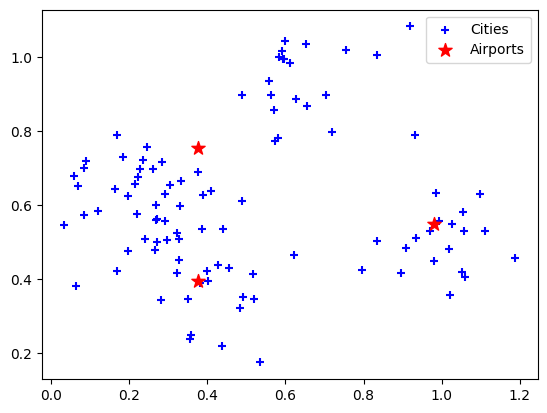

In [56]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))


import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

def objective_function(airports, cities):
    total = 0.0
    for city in cities:
        dist = []
        for airport in airports:
            dist.append((airport[0] - city[0])**2 + (airport[1] - city[1])**2)
        total += min(dist)
    return total

def calc_gradient(airports, cities):
    gradient = []
    set1 = []
    set2 = []
    set3 = []
    for city in cities:
        dist = []
        for airport in airports:
            dist.append((airport[0] - city[0])**2 + (airport[1] - city[1])**2)
        if (dist.index(min(dist)) == 0):
            set1.append(city)
        elif (dist.index(min(dist)) == 1):
            set2.append(city)
        else:
            set3.append(city)

    sum_x = 0
    sum_y = 0
    for city in set1:
        sum_x += (2 * (airports[0][0] - city[0]))
        sum_y += (2 * (airports[0][1] - city[1]))
    gradient.append(sum_x)
    gradient.append(sum_y)

    sum_x = 0
    sum_y = 0
    for city in set2:
        sum_x += (2 * (airports[1][0] - city[0]))
        sum_y += (2 * (airports[1][1] - city[1]))
    gradient.append(sum_x)
    gradient.append(sum_y)

    sum_x = 0
    sum_y = 0
    for city in set3:
        sum_x += (2 * (airports[2][0] - city[0]))
        sum_y += (2 * (airports[2][1] - city[1]))
    gradient.append(sum_x)
    gradient.append(sum_y)

    return gradient

obj_val = []
for iter in range(100):
    obj = objective_function(airports, cities)
    obj_val.append(obj)

    gradient = calc_gradient(airports, cities)

    counter = 0
    new_airports = []

    for airport in airports:
        x = airport[0] - (0.001 * gradient[counter])
        y = airport[1] - (0.001 * gradient[counter + 1])
        new_airports.append((x,y))
        counter += 2

    airports = new_airports

plt.figure(figsize=(8,5))
plt.plot(obj_val, 'o', color='b')
plt.show()

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt
    
